In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

#we have already recorded a video of our car driving around in sim, so let's start
#by opening that up

vidFile = "output.avi"

vidcap = cv2.VideoCapture(vidFile)
video = cv2.VideoWriter('video.avi', 0, 1,(320,240))

#convert the video into a series of captured images for our model to train on
success,image = vidcap.read()
count = 0
success = True
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
  video.write(image) 
  success,image = vidcap.read()
  print ('Read a new frame: ', success)
  count += 1
 
cv2.destroyAllWindows()
video.release()


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/home/fizzer/enph353_ws/src/bringing-anki-back/competition_2019t2/training-data/plate_pics/"

img_tot = []

for img in os.listdir(DATADIR):  # iterate over all the images
        img_array = cv2.imread(os.path.join(DATADIR,img), cv2.IMREAD_GRAYSCALE)  # convert to array  ,cv2.IMREAD_GRAYSCALE
        (thresh, threshin) = cv2.threshold(img_array, 100, 255, cv2.THRESH_BINARY_INV)
        cropped_thresh = np.array(threshin[30:75, 10:90])
        img_expanded = tf.expand_dims(img_array, 2)
        print(img_expanded.shape)
        img_tot.append(img_expanded)

/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)
(600, 300, 1)


(600, 300)


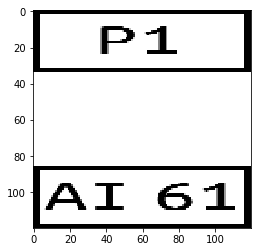

(120, 120)
(18, 106)


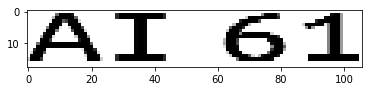

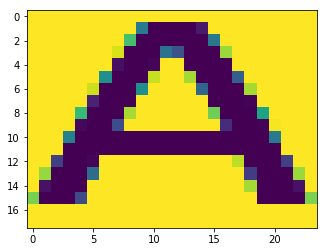

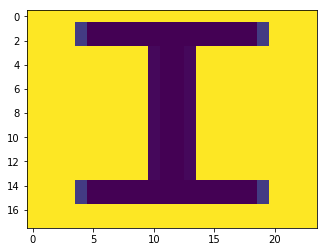

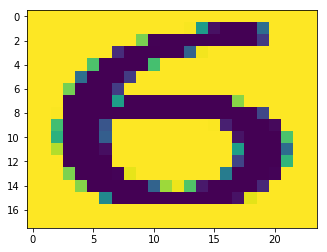

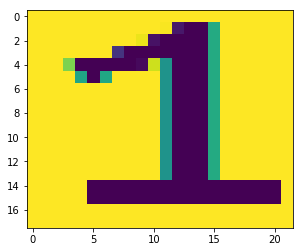

True

In [73]:
print(img_array.shape)

IMG_SIZE = 120

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
print(new_array.shape)

cropped_thresh = np.array(new_array[94:112, 6:112])
print(cropped_thresh.shape)
plt.imshow(cropped_thresh, cmap='gray')
plt.show()

crop1 = cropped_thresh[0:18, 0:24]
plt.imshow(crop1)
plt.show()

crop2 = cropped_thresh[0:18, 24:48]
plt.imshow(crop2)
plt.show()

crop3 = cropped_thresh[0:80, 60:84]
plt.imshow(crop3)
plt.show()

crop4 = cropped_thresh[0:80, 84:108]
plt.imshow(crop4)
plt.show()

cv2.imwrite("character-recog-data/A/frame0.jpg", crop1)     # save frame as JPEG file
cv2.imwrite("character-recog-data/I/frame0.jpg", crop2)     # save frame as JPEG file
cv2.imwrite("character-recog-data/6/frame0.jpg", crop3)     # save frame as JPEG file
cv2.imwrite("character-recog-data/1/frame0.jpg", crop4)     # save frame as JPEG file

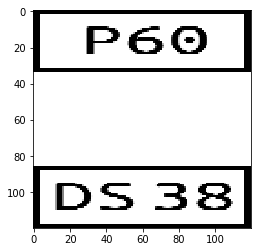

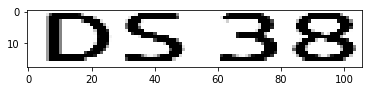

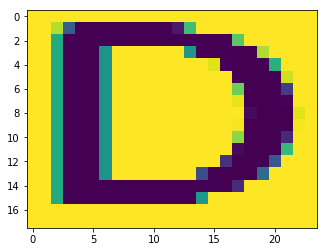

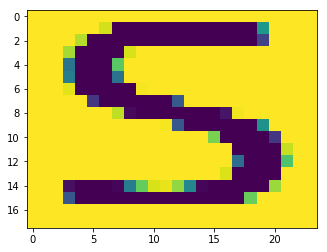

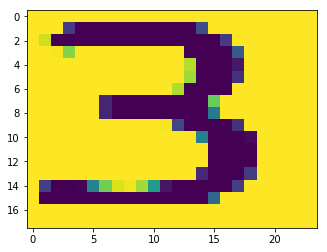

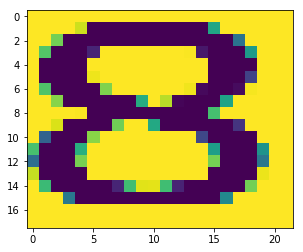

In [97]:
count = 0

DATADIR = "/home/fizzer/enph353_ws/src/bringing-anki-back/competition_2019t2/training-data/plate_pics/extra/"


for img in os.listdir(DATADIR):  # iterate over all the images
        img_array = cv2.imread(os.path.join(DATADIR,img), cv2.IMREAD_GRAYSCALE)   # convert to array  ,cv2.IMREAD_GRAYSCALE
        resized_img = (cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)))
        
        plt.imshow(resized_img, cmap='gray')
        plt.show()
        
        cropped_thresh = np.array(resized_img[94:112, 6:112])
        plt.imshow(cropped_thresh, cmap='gray')
        plt.show()
    
        crop1 = cropped_thresh[0:18, 4:28]
        plt.imshow(crop1)
        plt.show()

        crop2 = cropped_thresh[0:18, 28:52]
        plt.imshow(crop2)
        plt.show()

        crop3 = cropped_thresh[0:80, 60:84]
        plt.imshow(crop3)
        plt.show()

        crop4 = cropped_thresh[0:80, 84:108]
        plt.imshow(crop4)
        plt.show()
        
        #yes so not everything will be sorted correctly when you run this the first time
        #but it's good enough to augment and save the data and we can move it to the correct
        #class afterwards
        cv2.imwrite("character-recog-data/D/frame%d.jpg" % count, crop1)
        #cv2.imwrite("character-recog-data/V/frame%d.jpg" % count, crop2)
#         cv2.imwrite("character-recog-data/6/frame%d.jpg" % count, crop3)
#         cv2.imwrite("character-recog-data/1/frame%d.jpg" % count, crop4)
        
        count += 1

In [136]:
#ok now we have to rotate the characters slightly at different angles to create
#our full set of data

# Importing necessary functions 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 

# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator( 
		rotation_range = 40, 
		shear_range = 0.2, 
		zoom_range = 0.2, 
		horizontal_flip = False, 
		brightness_range = (0.5, 1.5)) 
	
# Loading a sample image 
img = load_img('character-recog-data/9/frame0.jpg') 
# Converting the input sample image to an array 
x = img_to_array(img) 
# Reshaping the input image 
x = x.reshape((1, ) + x.shape) 

# Generating and saving 5 augmented samples 
# using the above defined parameters. 
i = 0
for batch in datagen.flow(x, batch_size = 1, 
                        save_to_dir ='character-recog-data/9', 
                        save_prefix ='frame', save_format ='jpg'): 
    i += 1
    if i > 5: 
        break
